In [18]:
def distance(a,b,values):#calulating euclidean distance
    dist = 0
    for i in values:
        dist += math.pow(a[i]-b[i],2)
    return math.sqrt(dist)

def NN(a,b,values):#calculating nearest neighbor
    val = []
    for i in a:
        dist = distance(i,b,values)
        val.append([dist,i[0]])
    val.sort(key=operator.itemgetter(0))
    return val[0][1]

In [19]:
def calculate_acc(mat,current_feat,feature,choice):#calcuating accuracy with a set of features

    freq = 0
    current = list(current_feat[:])
    if choice == 1:
        current.append(feature)
    else:
        current.remove(feature)

    for k in range(0, len(mat)):
        train = mat[:]
        test = train.pop(k)
        group = NN(train,test,current)
        if test[0] == group:
            freq += 1
    acc = freq / float(len(mat))
    return acc

In [20]:
def forward_selection(mat):#forward selection
    global xx
    global yy
    xx=[]
    yy=[]
    ff = []
    fa = 0
    current_features = []
    feature_size = len(mat[0])
    accuracies = []
    inc=0
    for i in range(1,feature_size):
        added_feature = -1
        ba = 0

        for j in range(1,feature_size):
            if j not in current_features:
                acc = calculate_acc(mat,current_features,j,1)
                print( "Using feature(s) ["+str(j)+"] acc is "+str(acc))
                if acc > ba:
                    ba = acc
                    added_feature = j

        if added_feature != -1:
            current_features.append(added_feature)
            print("\nlevel "+str(i)+" feature: "+ str(added_feature) + " added beacuse it has the highest accuracy")
            print("Best accuracy:"+str(ba)+" with features "+str(current_features))
            xx.append("lvl "+str(inc))
            inc+=1
            yy.append(ba)
            
            accuracies.append(ba)#appending accuracies
        if ba > fa:#updating best accuracy
            ff = current_features[:]
            fa = ba
    print("\n")
    print("Best feature subset is: "+str(ff))
    print("Best accuracy is: "+str(fa))

In [21]:
def backward_elimination(mat):#backward elimination
    ii=0
    global xx
    global yy
    ff = []
    fa = 0
    current_features = list(range(1,len(mat[0])))
    feature_size = len(mat[0])
    accuracies = []
    for i in range(1, feature_size):
        del_feature = -1
        ba = 0
        for j in range(1, feature_size):
            if j in current_features:
                acc = calculate_acc(mat, current_features,j,2)
                print("Using feature(s) [" + str(j) + "] acc is " + str(acc))
                if acc > ba:#updating best accuary
                    ba = acc
                    del_feature = j

        if del_feature != -1:
            current_features.remove(del_feature)
            print("\nlevel " + str(i) + " feature: " + str(del_feature)+" with accuracy:" + str(ba)+" was removed")
            accuracies.append(ba)
            xx.append("lvl "+str(ii))
            ii+=1
            yy.append(ba)
        if ba > fa:
            ff = current_features[:]
            fa = ba

    print("\n")
    print("Best feature subset is: "+str(ff))
    print("Best accuracy is: "+str(fa))
    

In [22]:
if __name__ == '__main__':#driver code
    file = "CS205_SP_2022_SMALLtestdata__79.txt"#text file can be changed for a different dataset
    with open(file) as f:
        data = f.readlines()
    row = []
    mat = []
    data = [x.strip() for x in data]
    for line in data:
        values = re.split(" +",line)
        for v in values:#converting to 2D matrix
            val = float(decimal.Decimal(v))
            row.append(val)
        mat.append(row)
        row = []

    print("Choose Algorithm\n 1.Forward Search\n 2.Backward Elimination")
    n = int(input("Enter your choice: "))
    
    start_time = time.time()
    if n==1:
        forward_selection(mat)
    elif n==2:
        backward_elimination(mat)
    else:
      print("Invalid Choice")
    print("--- %s seconds ---" % (time.time() - start_time))

Choose Algorithm
 1.Forward Search
 2.Backward Elimination
Enter your choice: 1
Using feature(s) [1] acc is 0.6866666666666666
Using feature(s) [2] acc is 0.71
Using feature(s) [3] acc is 0.7133333333333334
Using feature(s) [4] acc is 0.6833333333333333
Using feature(s) [5] acc is 0.69
Using feature(s) [6] acc is 0.7066666666666667
Using feature(s) [7] acc is 0.7033333333333334
Using feature(s) [8] acc is 0.8233333333333334
Using feature(s) [9] acc is 0.7233333333333334
Using feature(s) [10] acc is 0.68

level 1 feature: 8 added beacuse it has the highest accuracy
Best accuracy:0.8233333333333334 with features [8]
Using feature(s) [1] acc is 0.7733333333333333
Using feature(s) [2] acc is 0.9666666666666667
Using feature(s) [3] acc is 0.8366666666666667
Using feature(s) [4] acc is 0.7966666666666666
Using feature(s) [5] acc is 0.8333333333333334
Using feature(s) [6] acc is 0.82
Using feature(s) [7] acc is 0.81
Using feature(s) [9] acc is 0.8566666666666667
Using feature(s) [10] acc is 0

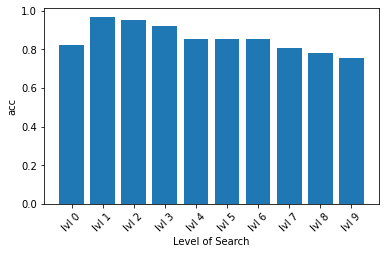

In [24]:
plt.gcf().autofmt_xdate()#data visualization
plt.xlabel("Level of Search")
plt.ylabel("acc")
plt.bar(xx,yy)

plt.xticks(rotation = 45)
plt.show()